<p class="h2 display-4 text-center">中国矿业大学（北京）</p>
<p class="h2 display-4 text-center">2022-2023学年第1学期本科课程线上考核（A卷）</p>
<hr class="my-4">
<p class="h4">课程名称：量化交易理论</p>
<p class="h4">课程性质：专业选修课</p>
<p class="h4">任课教师：李岩</p>

<p class="h4">学院班级：</p>

<p class="h4">姓名：</p>

<p class="h4">学号：</p>

<hr class="my-4">
<p class="h4">评分区域（由阅卷老师填写）</p>
<p class="h2">总分：</p>
<p class="h2">评分人：</p>

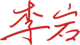

<hr class="my-4">
<p class="text text-danger text-center" style="font-size:20pt">答题要求</p>

1. 答题时间<font color="red"><strong>48小时</strong></font>，从2022年12月30日08:00 $\to$ 2023年01月01日08:00。
2. 答题完毕后在学习通上传答案，须提交`.ipynb`文件
3. 题目具有研究性质，综合运用所学知识尽可能得到更好的结果。
4. 每道题的解答须写出**必要**的步骤和过程，在每道题目后面增加单元格解答。
5. 凡是涉及到`random_state`的，`random_state`的取值为个人学号的**后三位**构成的整数。
6. 凡是涉及到划分训练集、检验集的，检验集的比例为$(\text{学号}\textbf{后三位}\text{构成的整数}+100)/1000$。例如，如果学号**后三位**是202，则检验集的比例是$(202+100)/1000=0.302$
7. 运算结果保留**三位小数**。
8. 可以查询有关资料，但须**个人独立**完成。一旦发现提交文档完全一样的情况，均视作0分处理。
<hr class="my-4">

<p class="lead"><b>现有若干股票数据，数据格式为<code>.csv</code></b></p>，股票名称与代码见下表：

|序号|股票|代码|
|:---:|:---:|:---:|
|0|华能国际|600011|
|1|华夏银行|600015|
|2|三一重工|600031|
|3|东风汽车|600006|
|4|中国神华|601088|
|5|中煤能源|601898|
|6|中信证券|600030|
|7|中国船舶|600150|
|8|工商银行|601398|

- 利用下个单元格的代码获取需要分析的两只只股票**对应的序号**（序号见上表）。其中，令`random_state`的值更改为你的**学号后三位数字**
    - 例如，学号后三位为102，则令`random_state=102`
- 后续所有问题均针对**获取的两只股票**展开。

In [21]:
# 请运行该单元格，获取股票序号
import pandas as pd
stId = input('输入学号后三位：')
idx = pd.Series(range(9)).sample(2, random_state=int(stId))
print(f'获取的股票序号为{idx.values}')

获取的股票序号为[0 8]


# 原始数据处理（计20分）

- 读入两只标的数据存储成`DataFrame`格式，将日期列转换为时间格式，提取年月日，并将其设置为该`DataFrame`的`index`，删除两个数据中的`amount`和`open_interest`两列。（**5分**）
- 给出两个数据集中的**开盘价、最高价、最低价、收盘价、成交量**的均值、标准差、最大值、最小值。（**5分**）
- 两只股票各有哪些天是全天涨停、哪些天是全天跌停？（**5分**）
    - 提示：全天涨停或跌停的特征是当天的最高价和最低价相等

In [22]:
import math
import datetime
huaneng=pd.read_csv('华能国际-sse.600011.csv')
gongshang=pd.read_csv('工商银行-sse.601398.csv')
huaneng.drop(['amount','open_interest'],axis=1,inplace=True)
gongshang.drop(['amount','open_interest'],axis=1,inplace=True)
huaneng['time']=pd.to_datetime(huaneng['time'])
for i in range(0,len(huaneng['time'])):
    huaneng.loc[i,'time']=datetime.datetime(huaneng['time'][i].year,huaneng['time'][i].month,huaneng['time'][i].day)
gongshang['time']=pd.to_datetime(gongshang['time'])
for i in range(0,len(gongshang['time'])):
    gongshang.loc[i,'time']=datetime.datetime(gongshang['time'][i].year,gongshang['time'][i].month,gongshang['time'][i].day)
huaneng.index=huaneng['time']
gongshang.index=gongshang['time']
result_huaneng=[]
list=['open','high','low','close','volume']
for i in range(0,5):
    result_huaneng.append([huaneng[list[i]].mean(),math.sqrt(huaneng[list[i]].var()),huaneng[list[i]].max(),huaneng[list[i]].min()])
result_gongshang=[]
for i in range(0,5):
    result_gongshang.append([gongshang[list[i]].mean(),math.sqrt(gongshang[list[i]].var()),gongshang[list[i]].max(),gongshang[list[i]].min()])
time_huaneng=[]
for i in range(len(huaneng)):
    if(huaneng['open'][i]==huaneng['close'][i]):
        time_huaneng.append(huaneng.index[i])
time_gongshang=[]
for i in range(len(gongshang)):
    if(gongshang['open'][i]==gongshang['close'][i]):
        time_gongshang.append(gongshang.index[i])
for i in range(len(result_gongshang)):
    for j in range(len(result_gongshang[i])):
        result_gongshang[i][j]=round(result_gongshang[i][j],3)
        result_huaneng[i][j]=round(result_huaneng[i][j],3)
print(result_gongshang)
print(result_huaneng)
print(time_gongshang)
print(time_huaneng)

[[4.769, 0.786, 7.6, 3.22], [4.812, 0.8, 7.77, 3.23], [4.732, 0.774, 7.46, 3.2], [4.776, 0.787, 7.75, 3.23], [1828981.921, 1964364.289, 21162590.0, 110285.0]]
[[6.561, 1.534, 13.6, 3.79], [6.673, 1.6, 14.76, 3.83], [6.458, 1.474, 13.13, 3.74], [6.571, 1.542, 14.08, 3.77], [359985.467, 455643.998, 4147887, 11068]]
[Timestamp('2012-01-11 00:00:00'), Timestamp('2012-01-12 00:00:00'), Timestamp('2012-01-13 00:00:00'), Timestamp('2012-01-20 00:00:00'), Timestamp('2012-02-06 00:00:00'), Timestamp('2012-02-13 00:00:00'), Timestamp('2012-03-08 00:00:00'), Timestamp('2012-03-15 00:00:00'), Timestamp('2012-03-19 00:00:00'), Timestamp('2012-05-08 00:00:00'), Timestamp('2012-05-10 00:00:00'), Timestamp('2012-05-14 00:00:00'), Timestamp('2012-05-22 00:00:00'), Timestamp('2012-05-25 00:00:00'), Timestamp('2012-06-06 00:00:00'), Timestamp('2012-06-11 00:00:00'), Timestamp('2012-06-12 00:00:00'), Timestamp('2012-06-19 00:00:00'), Timestamp('2012-06-26 00:00:00'), Timestamp('2012-07-13 00:00:00'), Time

# 合约数据可视化展示（计20分）

- 在选定的两只股票中，任选一只绘制**2020年以来**标的日度k线图，在k线图上绘制30日和120日均线，绘制相应时间段内的`ATR`指标（ATR的时间窗口是20天），并以副图形式显示，同时在副图上显示成交量。(**10分**)
- 从两只股票的第一个交易日起各建立1手多头仓位并一直持有，绘制两只股票每日收益率(用收盘价计算)的直方图，并计算在99\%置信度下的最大亏损各是多少。(**10分**)
    - 提示1：直方图利用`pandas`的绘图方法，即`df.plot(kind='hist',bins=30)`
    - 提示2：最大亏损计算用VaR。假设每只股票各有10万元的初始资金


/tmp/ipykernel_29134/523362528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huaneng['TR'][i]=max(huaneng['high'][i]-huaneng['low'][i],abs(huaneng['high'][i]-huaneng['close'][i-1]),abs(huaneng['low'][i]-huaneng['close'][i-1]))


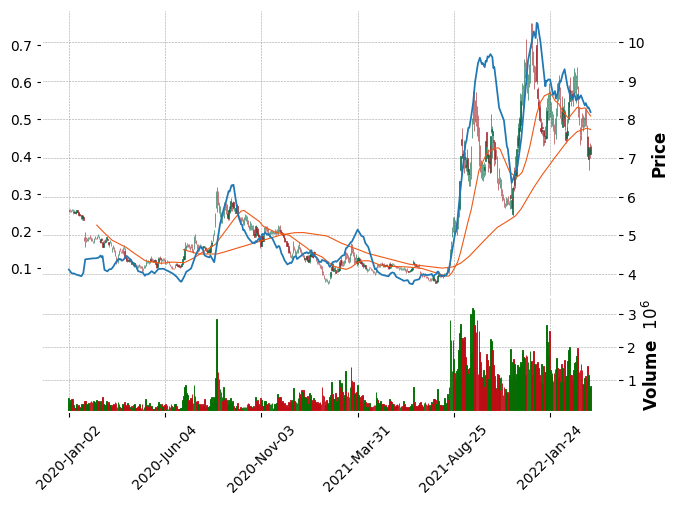

/tmp/ipykernel_29134/523362528.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huaneng['return'][i]=(huaneng['close'][i]-huaneng['close'][i-1])/huaneng['close'][i-1]
/tmp/ipykernel_29134/523362528.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gongshang['return'][i]=(gongshang['close'][i]-gongshang['close'][i-1])/gongshang['close'][i-1]


-3752.456
-6815.332


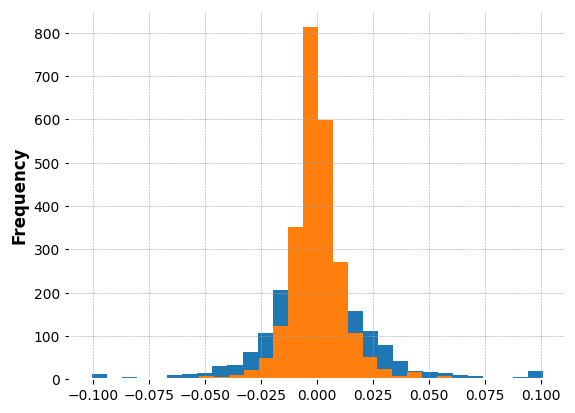

In [23]:
import mplfinance as mpf
huaneng['TR']=0
huaneng['ATR']=0
for i in range(1,len(huaneng)):
    huaneng['TR'][i]=max(huaneng['high'][i]-huaneng['low'][i],abs(huaneng['high'][i]-huaneng['close'][i-1]),abs(huaneng['low'][i]-huaneng['close'][i-1]))
huaneng['ATR']=huaneng['TR'].rolling(20).mean()
huanengtemp=huaneng[huaneng.index>='2020-01-01']
mpf.plot(huanengtemp,type='candle',style='charles',volume=True,mav=(30,120),addplot=mpf.make_addplot(huanengtemp['ATR']))
huaneng['return']=0
for i in range(1,len(huaneng)):
    huaneng['return'][i]=(huaneng['close'][i]-huaneng['close'][i-1])/huaneng['close'][i-1]
huaneng['return'].plot.hist(bins=30)
gongshang['return']=0
for i in range(1,len(gongshang)):
    gongshang['return'][i]=(gongshang['close'][i]-gongshang['close'][i-1])/gongshang['close'][i-1]
gongshang['return'].plot.hist(bins=30)
loss_gongshang=gongshang['return'].quantile(0.01)*100000
loss_huaneng=huaneng['return'].quantile(0.01)*100000
print(round(loss_gongshang,3))
print(round(loss_huaneng,3))

# 多因子模型选股（计30分）

- 读取Famma-French三因子数据和无风险利率数据（**计5分**）
    - Famma-French数据为`RESSET_THRFACDAT_DAILY.csv`
    - 无风险利率数据为`shibor.csv`
    - 提示：用横向合并三因子数据与无风险利率数据（连接方式为`inner`）
- 构建并计算所选两只股票的Famma-French三因子模型（**计15分**）
    - 无风险利率用银行间三个月拆借利率`shibor3M`
- 假设采用多因子模型选股，这两只股票是否应当加入到股票池中？为什么？（**计10分**）

In [24]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import datetime
alphas = []
huaneng=pd.read_csv('华能国际-sse.600011.csv')
gongshang=pd.read_csv('工商银行-sse.601398.csv')
huaneng.drop(['amount','open_interest'],axis=1,inplace=True)
gongshang.drop(['amount','open_interest'],axis=1,inplace=True)
huaneng['time']=pd.to_datetime(huaneng['time'])
for i in range(0,len(huaneng['time'])):
    huaneng.loc[i,'time']=datetime.datetime(huaneng['time'][i].year,huaneng['time'][i].month,huaneng['time'][i].day)
gongshang['time']=pd.to_datetime(gongshang['time'])
for i in range(0,len(gongshang['time'])):
    gongshang.loc[i,'time']=datetime.datetime(gongshang['time'][i].year,gongshang['time'][i].month,gongshang['time'][i].day)
def regression(df):
    x = np.column_stack((df['市场溢酬因子__总市值加权_Rmrf_mc'], df['市值因子__总市值加权_Smb_mc'], df['账面市值比因子__总市值加权_Hml_mc']))
    y = df['return']
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    print(model.summary())
    if model.pvalues[0] < 0.05:
        alphas.append(model.params[0])

Famma=pd.read_csv("RESSET_THRFACDAT_DAILY.csv",encoding='gb2312').rename(columns={'日期_Date':'time'})
shibor=pd.read_csv("shibor.csv").rename(columns={'date':'time'})
Famma['time']=pd.to_datetime(Famma['time'])
shibor['time']=pd.to_datetime(shibor['time'])
data=pd.merge(Famma,shibor,on='time',how='inner')
huaneng=pd.merge(huaneng,data,on='time',how='inner')
huaneng['yields']=0
for i in range(1,len(huaneng)):
    huaneng['yields'][i]=(huaneng['close'][i]-huaneng['close'][i-1])/huaneng['close'][i-1]
huaneng['shibor3M']=huaneng['shibor3M']/100
gongshang=pd.merge(gongshang,data,on='time',how='inner')
gongshang['yields']=0
gongshang['shibor3M']=gongshang['shibor3M']/100
for i in range(1,len(gongshang)):
    gongshang['yields'][i]=(gongshang['close'][i]-gongshang['close'][i-1])/gongshang['close'][i-1]
huaneng['return']=huaneng['yields']-huaneng['shibor3M']
gongshang['return']=gongshang['yields']-gongshang['shibor3M']
x = np.column_stack((huaneng['市场溢酬因子__总市值加权_Rmrf_mc'], huaneng['市值因子__总市值加权_Smb_mc'], huaneng['账面市值比因子__总市值加权_Hml_mc']))
y = huaneng['return']
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())
if model.pvalues[0] < 0.05:
    alphas.append(model.params[0])
x=np.column_stack((gongshang['市场溢酬因子__总市值加权_Rmrf_mc'],gongshang['市值因子__总市值加权_Smb_mc'],gongshang['账面市值比因子__总市值加权_Hml_mc']))
y=gongshang['return']
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
print(model.summary())
if model.pvalues[0] < 0.05:
    alphas.append(model.params[0])
print(alphas)
for i in range(len(alphas)):
    alphas[i]=round(alphas[i],3)
print(alphas)

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     288.1
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          1.80e-160
Time:                        21:17:15   Log-Likelihood:                 5965.5
No. Observations:                2486   AIC:                        -1.192e+04
Df Residuals:                    2482   BIC:                        -1.190e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0357      0.000    -80.892      0.0

/tmp/ipykernel_29134/2728520184.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  huaneng['yields'][i]=(huaneng['close'][i]-huaneng['close'][i-1])/huaneng['close'][i-1]
/tmp/ipykernel_29134/2728520184.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gongshang['yields'][i]=(gongshang['close'][i]-gongshang['close'][i-1])/gongshang['close'][i-1]


# 利用机器学习算法预测收益率（计30分）

- 在给定的两只股票中，**任选一只完成本题目**
- 将上题计算的**每日收益率**按照**大于0和小于等于0**分成两类，形成类别标签。（**5分**）
- 读入该只股票对应的PE、OBV20、CCI20、MOMENTUM3M、REVS10、BETA21、CAPMALPHA21预测属性，并进行MinMax标准化。（**10分**）
    - 因子数据文件名称为`股票代码-factors.csv`
- 以上述因子为预测属性，构建机器学习模型，预测**下一个交易日**的收益率涨跌情况，并检验该分类模型效果。（**15分**）
    - 检验集的比例按照**答题要求第6点**设置
    - 学号末尾为**奇数**的选用**随机森林**算法
    - 学号末尾为**偶数**的选用**AdaBoosting**算法

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
gongshang=pd.read_csv("工商银行-sse.601398.csv")
gongshang['time']=pd.to_datetime(gongshang['time'])
for i in range(0,len(gongshang['time'])):
    gongshang.loc[i,'time']=datetime.datetime(gongshang['time'][i].year,gongshang['time'][i].month,gongshang['time'][i].day)
gongshang['yields']=0
for i in range(1,len(gongshang)):
    gongshang['yields'][i]=(gongshang['close'][i]-gongshang['close'][i-1])/gongshang['close'][i-1]
temp=pd.read_csv("sse.601398-factors.csv").rename(columns={'date':'time'})
temp['time']=pd.to_datetime(temp['time'])
gongshang=pd.merge(gongshang,temp,on='time',how='inner')
gongshang['result']=0
for i in range(1,len(gongshang)):
    if(gongshang['yields'][i]>0):
        gongshang['result'][i]=1
    else:
        gongshang['result'][i]=0
data=gongshang[['PE','OBV20','CCI20','MOMENTUM3M','REVS10','BETA21','CAPMALPHA21','result']].dropna()
target=data['result']
data.drop(['result'],axis=1,inplace=True)
min_max_scaler = MinMaxScaler()
data=min_max_scaler.fit_transform(data)
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=(int(stId)+100)/1000, random_state=int(stId))
clf = AdaBoostClassifier(random_state=int(stId))
clf.fit(X_train, Y_train)
clf.predict(X_test)
print(round(accuracy_score(Y_test, clf.predict(X_test)),3))


/tmp/ipykernel_29134/2043014064.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gongshang['yields'][i]=(gongshang['close'][i]-gongshang['close'][i-1])/gongshang['close'][i-1]
/tmp/ipykernel_29134/2043014064.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gongshang['result'][i]=1
/tmp/ipykernel_29134/2043014064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gongshang['result'][i]=0


0.547
